# Applying TOPSIS to Select the Best Text Generation Model

## Objective
To evaluate multiple pre-trained text generation models using multiple criteria and rank them using the TOPSIS (Technique for Order Preference by Similarity to Ideal Solution) method.

## Models Compared
- GPT-2
- DistilGPT2
- T5-Small
- FLAN-T5-Base

## Criteria Used
1. Perplexity (Cost)
2. BLEU Score (Benefit)
3. ROUGE-L Score (Benefit)
4. Inference Time (Cost)
5. Model Size (Cost)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/decision_matrix.csv")
df


,Model,Perplexity,BLEU,ROUGE,Time,Size
0,gpt2,32.5,0.21,0.34,1.2,124
1,distilgpt2,28.7,0.19,0.31,0.8,82
2,t5-small,25.3,0.25,0.38,1.5,60
3,flan-t5-base,22.4,0.28,0.42,1.8,250


This table represents the original decision matrix where each row corresponds to a model and each column represents a performance criterion.


In [3]:
models = df["Model"]
criteria_data = df.drop(columns=["Model"])
matrix = criteria_data.values

criteria_data


,Perplexity,BLEU,ROUGE,Time,Size
0,32.5,0.21,0.34,1.2,124
1,28.7,0.19,0.31,0.8,82
2,25.3,0.25,0.38,1.5,60
3,22.4,0.28,0.42,1.8,250


In [4]:
weights = np.array([0.25, 0.25, 0.20, 0.15, 0.15])
impacts = ["-", "+", "+", "-", "-"]

print("Weights:", weights)
print("Impacts:", impacts)


Weights: [0.25 0.25 0.2  0.15 0.15]
Impacts: ['-', '+', '+', '-', '-']


Weights represent the importance of each criterion.
Impacts define whether a criterion is a benefit (+) or cost (-).


In [5]:
norm = np.sqrt((matrix ** 2).sum(axis=0))
normalized = matrix / norm

normalized_df = pd.DataFrame(
    normalized,
    columns=criteria_data.columns,
    index=models
)

normalized_df


,Perplexity,BLEU,ROUGE,Time,Size
Model,,,,,
gpt2,0.591223,0.446606,0.465928,0.436147,0.417530
distilgpt2,0.522095,0.404072,0.424817,0.290765,0.276108
t5-small,0.460244,0.531674,0.520743,0.545184,0.202031
flan-t5-base,0.407489,0.595475,0.575559,0.654221,0.841794


Normalization ensures all criteria are on a comparable scale.


In [6]:
weighted = normalized * weights

weighted_df = pd.DataFrame(
    weighted,
    columns=criteria_data.columns,
    index=models
)

weighted_df


,Perplexity,BLEU,ROUGE,Time,Size
Model,,,,,
gpt2,0.147806,0.111652,0.093186,0.065422,0.062629
distilgpt2,0.130524,0.101018,0.084963,0.043615,0.041416
t5-small,0.115061,0.132919,0.104149,0.081778,0.030305
flan-t5-base,0.101872,0.148869,0.115112,0.098133,0.126269


Each normalized value is multiplied by its respective weight.


In [7]:
ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == "+":
        ideal_best.append(weighted[:, i].max())
        ideal_worst.append(weighted[:, i].min())
    else:
        ideal_best.append(weighted[:, i].min())
        ideal_worst.append(weighted[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

print("Ideal Best:", ideal_best)
print("Ideal Worst:", ideal_worst)


Ideal Best: [0.10187225 0.14886879 0.1151117  0.04361474 0.03030458]
Ideal Worst: [0.14780572 0.10101811 0.0849634  0.09813317 0.12626907]


In [8]:
distance_best = np.sqrt(((weighted - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted - ideal_worst) ** 2).sum(axis=1))

scores = distance_worst / (distance_best + distance_worst)

df["TOPSIS Score"] = scores
df["Rank"] = df["TOPSIS Score"].rank(ascending=False)

df.sort_values("TOPSIS Score", ascending=False)


,Model,Perplexity,BLEU,ROUGE,Time,Size,TOPSIS Score,Rank
2,t5-small,25.3,0.25,0.38,1.5,60,0.709285,1.0
1,distilgpt2,28.7,0.19,0.31,0.8,82,0.613866,2.0
0,gpt2,32.5,0.21,0.34,1.2,124,0.495472,3.0
3,flan-t5-base,22.4,0.28,0.42,1.8,250,0.397641,4.0


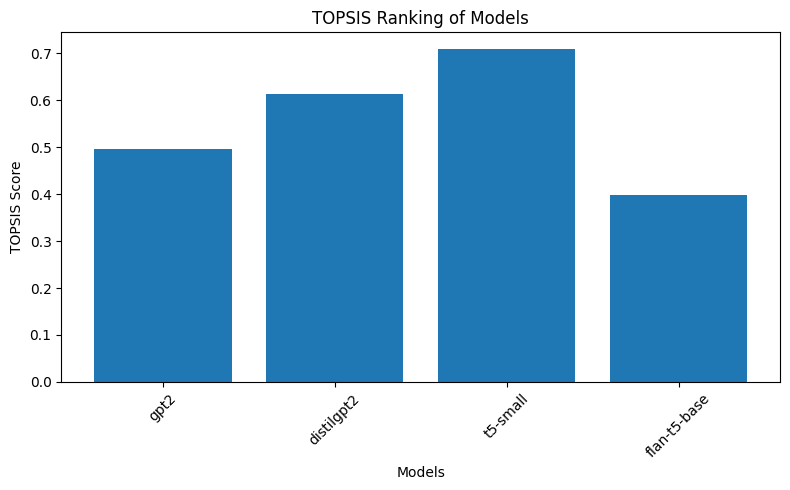

In [9]:
plt.figure(figsize=(8,5))
plt.bar(models, scores)
plt.title("TOPSIS Ranking of Models")
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


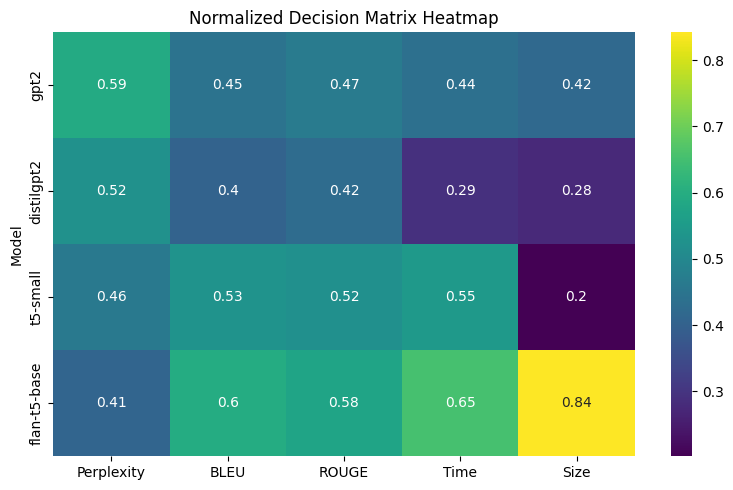

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(normalized_df, annot=True, cmap="viridis")
plt.title("Normalized Decision Matrix Heatmap")
plt.tight_layout()
plt.show()


## Conclusion

Based on TOPSIS analysis:

- The model with the highest score is the most suitable considering all criteria.
- TOPSIS provides a structured and objective approach to multi-criteria decision making.
- The ranking reflects a balance between performance quality and computational efficiency.

This method can be extended to other NLP tasks for selecting optimal models.
